In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

In [13]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [15]:
X_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [18]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

print(X_train[0].shape)

(28, 28)


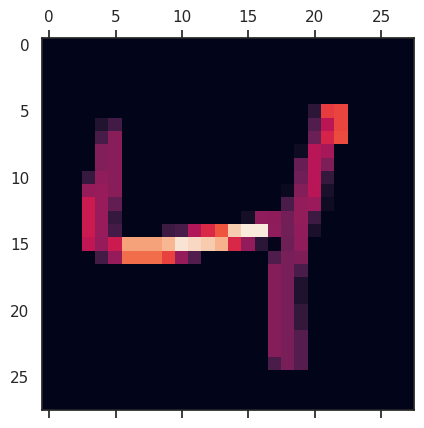

In [37]:
plt.matshow(X_train[2])

In [20]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 13ms/step - loss: 0.2579 - accuracy: 0.9230
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1233 - accuracy: 0.9651
Epoch 3/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0895 - accuracy: 0.9742
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0731 - accuracy: 0.9793
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0610 - accuracy: 0.9828
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0525 - accuracy: 0.9854
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0430 - accuracy: 0.9879
Epoch 8/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0434 - accuracy: 0.9876
Epoch 9/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0345 - accuracy: 0.9901
Epoch 10/15
1875/1875 [==============================] - 25s 13m

In [22]:
y_predicted = model.predict(X_test)
y_predicted[10]

313/313 [==============================] - 1s 3ms/step


array([9.9999994e-01, 1.1374681e-34, 6.0229851e-20, 7.9465980e-27,
       1.7288567e-19, 4.7275265e-22, 8.3532873e-20, 4.4873477e-24,
       3.5022564e-28, 5.9990936e-12], dtype=float32)

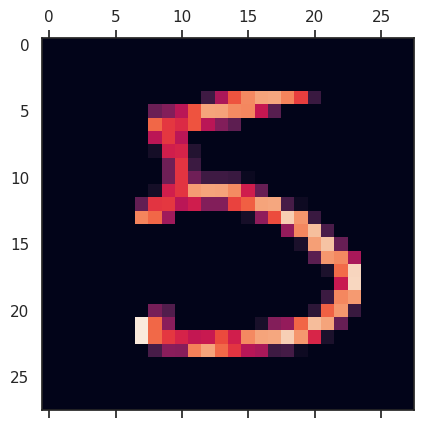

In [33]:
plt.matshow(X_test[15])

In [34]:
np.argmax(y_predicted[15])

5

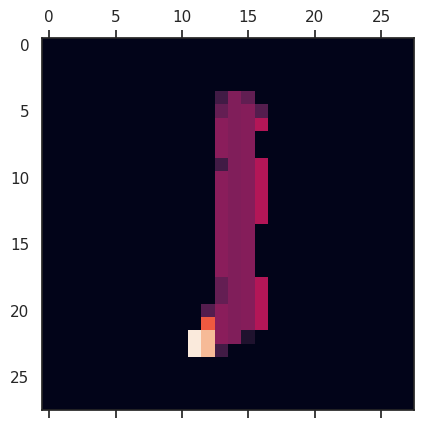

In [29]:
plt.matshow(X_test[14])

In [30]:
np.argmax(y_predicted[14])

1